# ODE in Julia

Ref : http://www.control.lth.se/media/Staff/GabrielIngesson/JuliaOde.pdf

* __[ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)__ : Julia로 작성된 기본적인 ODE Solver.  Fixed step, Adaptive, Stiff Solver 제공.
* __[Sundials.jl](https://github.com/JuliaDiffEq/Sundials.jl)__ : Sundials C library를 인터페이스.  Nonlinear 및 Differential/Algebraic equation Solvers 제공.

## ODE.jl
### Suport Solvers
* __ode23__ : 2차 적응 솔버.  Bogacki–Shampine 계수를 사용한 3차 에러 콘트롤 적용.
* __ode45__ : 4차 적응 솔버.  Dormand Prince 계수를 사용한 5차 에러 콘트롤 적용.  Fehlberg 및 Cash-Karp 계수 사용 가능.
* __ode78__ : 7th order adaptive solver with 8th order error control, using the Fehlberg coefficients.
* __ode23s__ : 2nd/3rd order adaptive solver for stiff problems, using a modified Rosenbrock triple.

### Terminal Velocity
* http://nbviewer.jupyter.org/github/JuliaLang/ODE.jl/blob/master/examples/Terminal_Velocity.ipynb



In [1]:
Pkg.add("ODE")

INFO: Cloning cache of ODE from https://github.com/JuliaDiffEq/ODE.jl.git
INFO: Cloning cache of Polynomials from https://github.com/Keno/Polynomials.jl.git
INFO: Installing ODE v0.2.1
INFO: Installing Polynomials v0.1.0
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of ODE
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [1]:
using ODE;

In [2]:
# Constants 
const g  = 9.8                # Accelaration of gravity
const p  = 1.2                # Density of air

# Caracteristics of the problem
const m  = 0.100              # A 100 g ball
const r  = 0.10               # 10 cm radius
const Cd = 0.5                # Drag coeficient for a small spherical object
const y0 = 1000.0             # Initial height of the body (1000 m)
const v0 = 10.0               # Initial velocity of the body (10 m/s^2, going up)
const A  = pi*r^2;            # Cross-section area of the body;

In [3]:
function gm(t, f)
    (y, v) = f                                          # Extract y and v (i.e., dy/dt) from the f mapping
    
    dy_dt = v                                           # The differential equations
    dv_dt = -1.0*g - sign(v)*(1./2.)*(p/m)*Cd*A*v^2.0
    
    [dy_dt; dv_dt]                                      # Return the derivatives
end;

In [4]:
# Initial conditions (position and velocity)
const start = [y0; v0]

# Time span (from 0 to 5 secs)
ts = [0.0; 5.0];

In [5]:
t, res = ode45(gm, start, ts)
y = map(x -> x[1], res)
v = map(x -> x[2], res);

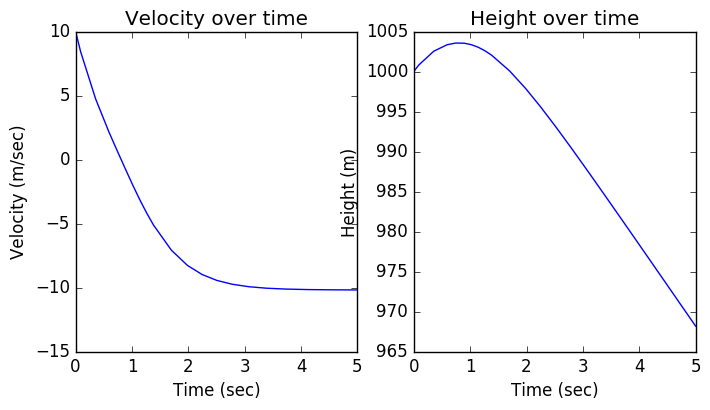

In [8]:
using PyPlot
fig, ax = subplots(1, 2, sharex=true, figsize=(8,4))

ax[1][:plot](t, v)
ax[1][:set_title]("Velocity over time");
ax[1][:set_xlabel]("Time (sec)")
ax[1][:set_ylabel]("Velocity (m/sec)")

ax[2][:plot](t, y)
ax[2][:set_title]("Height over time");
ax[2][:set_xlabel]("Time (sec)")
ax[2][:set_ylabel]("Height (m)");